In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0116-0505"
band = "I_BESS"
mjds = [60201, 60148, 60146]

star_ex_ref = 1616 #1394 #1574
star_ey_ref = 632 #629 #81

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.0

mkdir: stamps: File exists


-0.1 -89.7


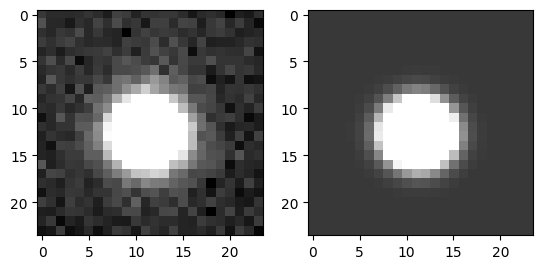

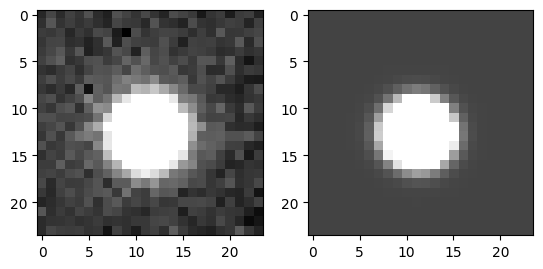

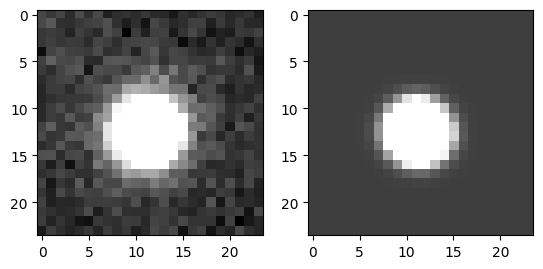

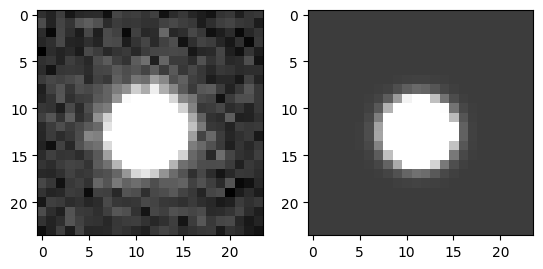

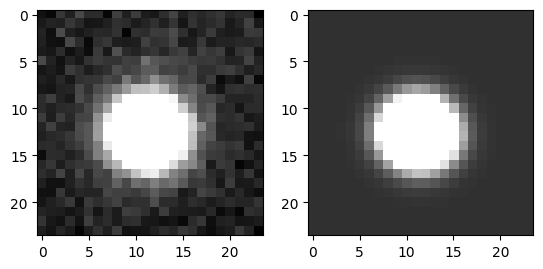

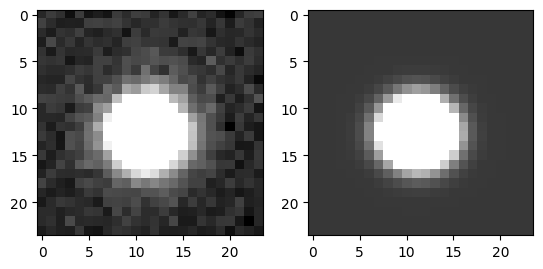

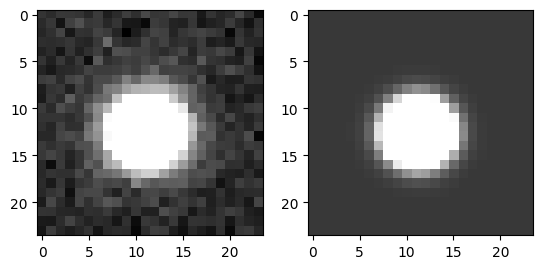

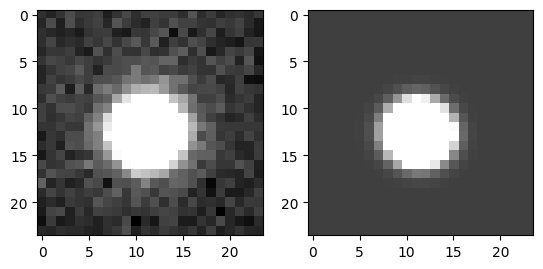

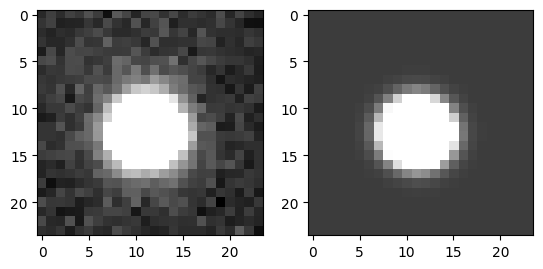

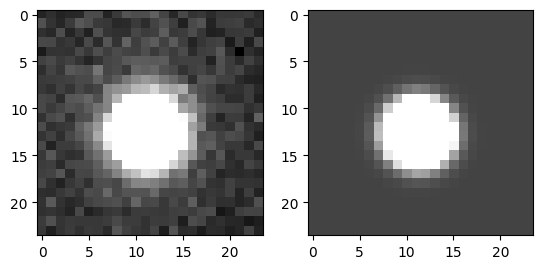

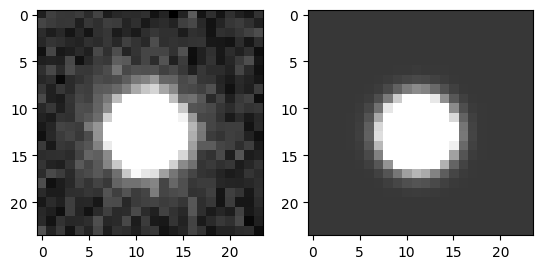

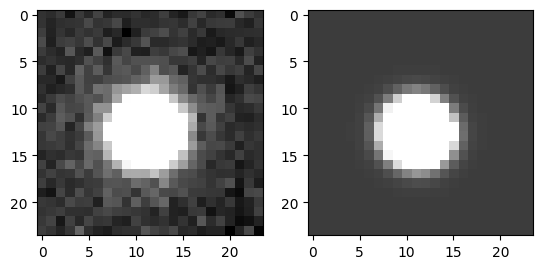

[1.12362136 1.01161771 0.91871081 0.93835126 1.24536159 1.20877094
 1.08801472 0.95131717 1.05369767 1.01709602 1.08317294 1.02345165]
Target FWHM:  1.3
1.1017856701562907 0.27764998887938525


1.3758910091692549 0.34672453431065225


1.5499558565526734 0.3905888758512737


1.5161750040477253 0.38207610102002676


0.628442458271032 0.15836749948430007


0.806192664676329 0.2031605514984349


1.1989831604006442 0.30214375642096236


1.4930534557756034 0.3762494708554521


1.2830729128090042 0.3233343740278691


1.3643735107177517 0.3438221247008734


1.2113684454245934 0.30526484824699757


1.3508094525750594 0.340403982048915


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/Resolved_Polarization/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -89.6


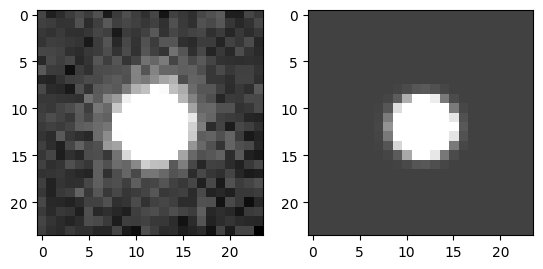

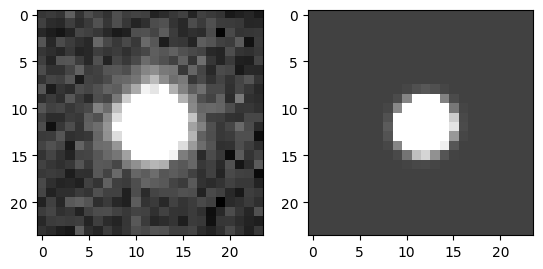

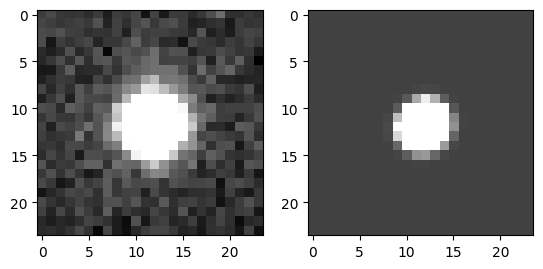

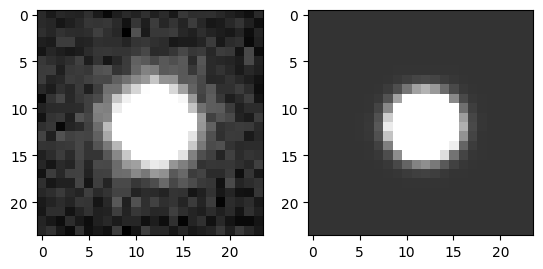

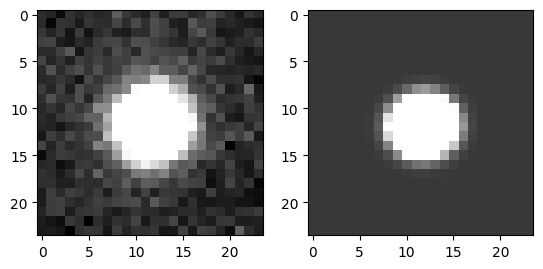

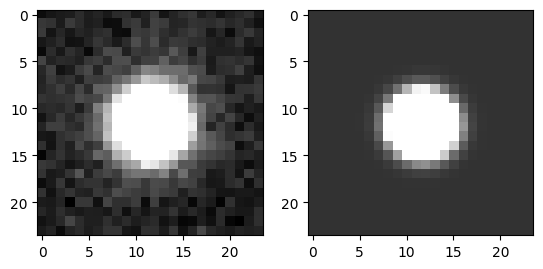

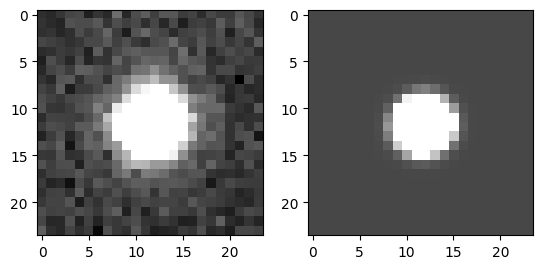

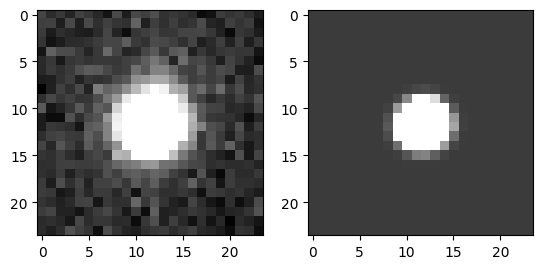

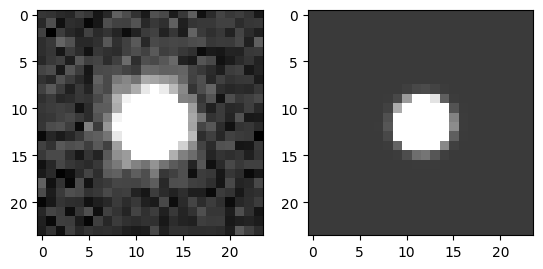

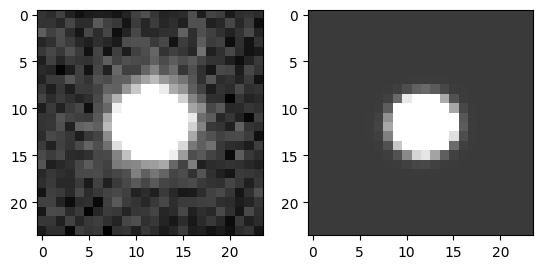

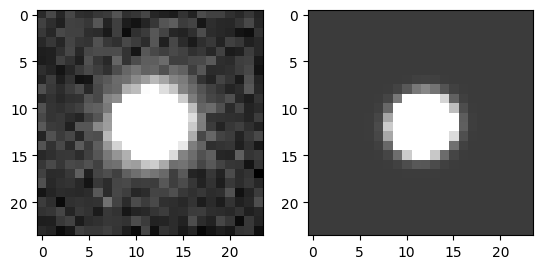

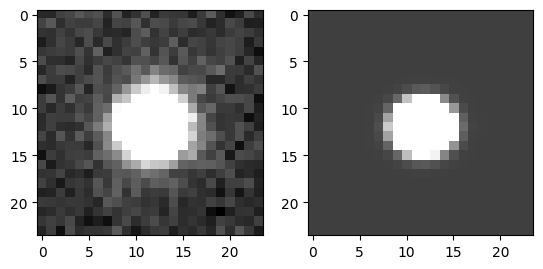

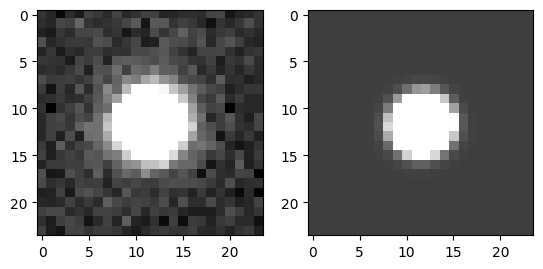

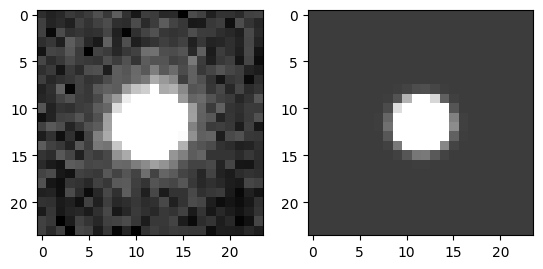

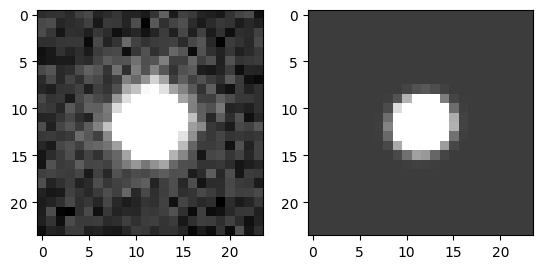

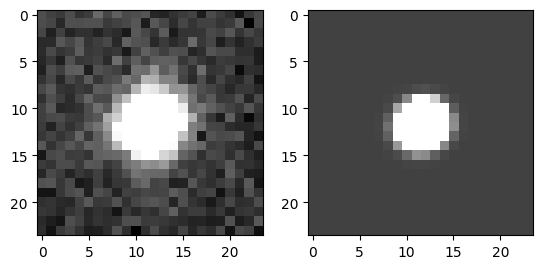

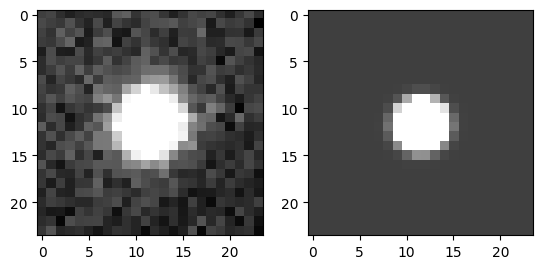

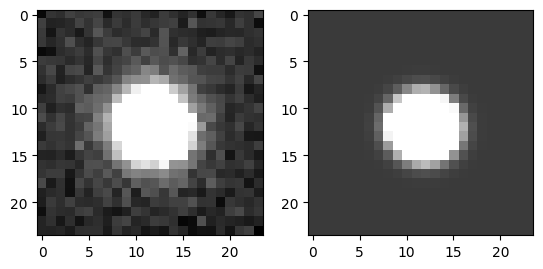

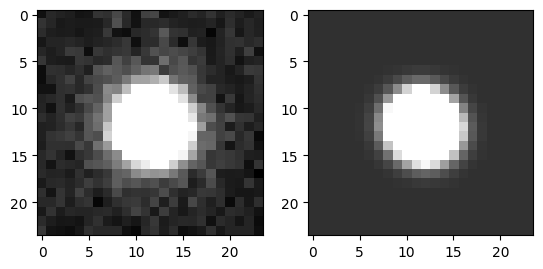

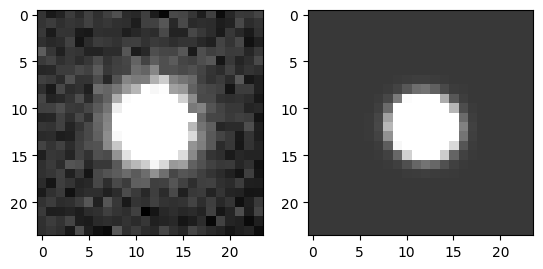

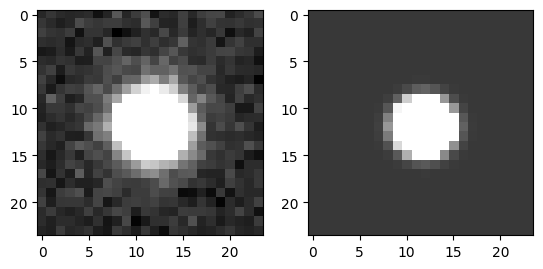

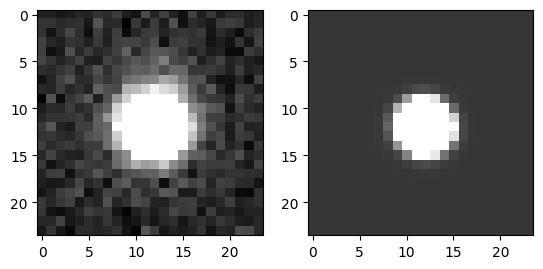

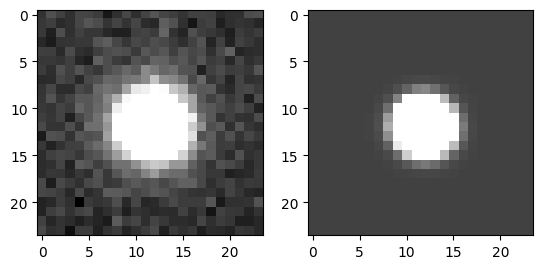

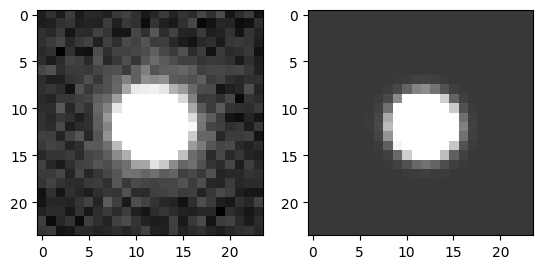

[0.72906293 0.6711723  0.60614057 0.94887969 0.88604168 0.98527316
 0.75372884 0.6470697  0.6279519  0.75168267 0.79936454 0.77116415
 0.81243413 0.65261372 0.68121086 0.64906666 0.65153148 0.96060943
 1.10271489 0.82816891 0.77794536 0.71151778 0.8372378  0.84757895]
Target FWHM:  1.2
1.6061879774998362 0.40475937032995873


1.6763153533404656 0.42243146904179735


1.7452567991877608 0.43980471339531574


1.2379089470404216 0.31195305465418627


1.3637639993110309 0.3436685278263798


1.154350698214883 0.2908963759501505


1.5735237090855347 0.39652797468955475


1.7030153837139044 0.4291598766959039


1.7232186712867708 0.43425110516426624


1.5763008155498315 0.3972278055185575


1.5082120978005866 0.3800694486457478


1.549346917885074 0.3904354233070387


1.4882480924048658 0.37503851928602616


1.6969972046379473 0.42764329556876274


1.6647764012885995 0.41952365312472706


1.70085600256347 0.42861571264599446


1.69817772368629 0.4279407863689451


1.2119463386350158 0.305410477336024


0.7975997532404878 0.20099513781660294


1.463412115287153 0.3687798530523626


1.5396897582587843 0.3880018190812136


1.6283782207731048 0.4103513116348224


1.4486838231067343 0.365068323422897


1.4315053825061108 0.3607393563915399


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/Resolved_Polarization/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -89.6


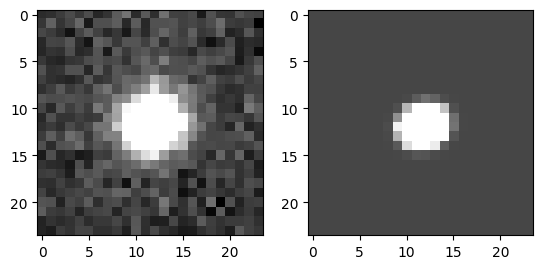

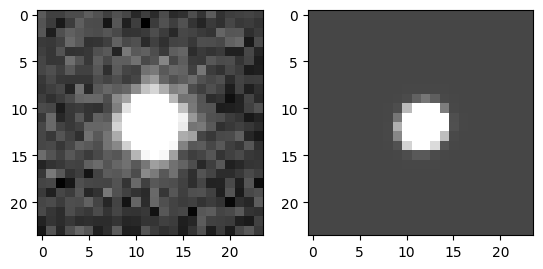

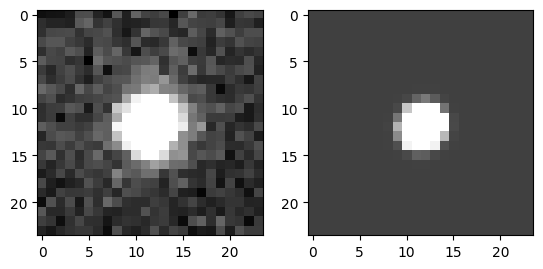

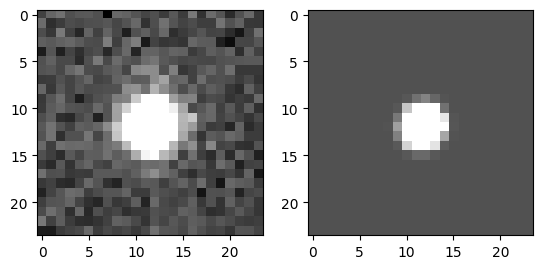

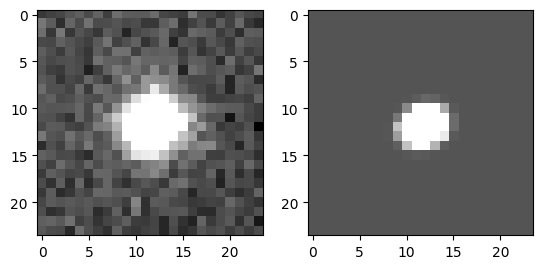

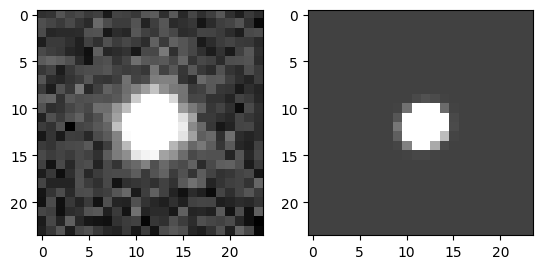

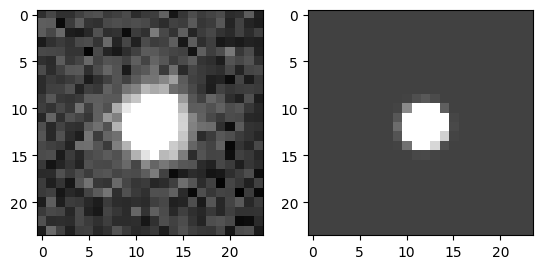

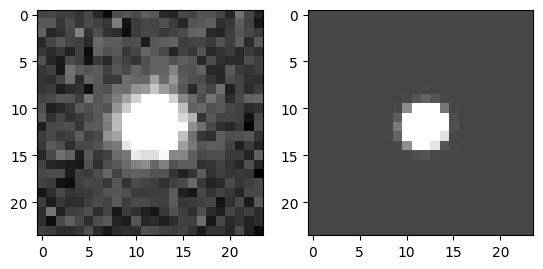

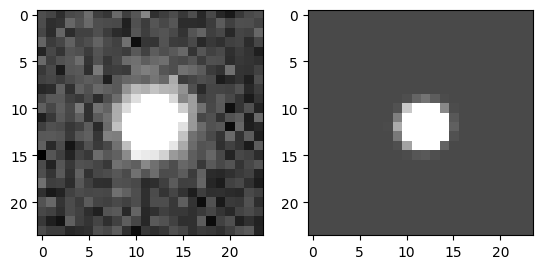

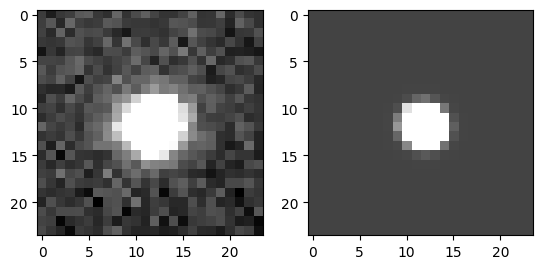

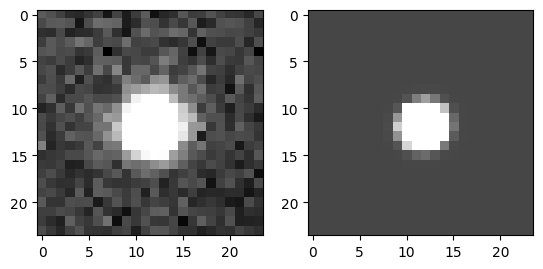

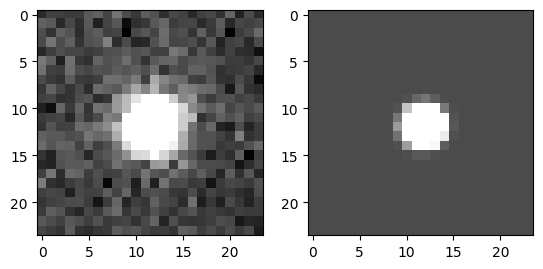

[0.55776913 0.52975489 0.54148616 0.53070594 0.51916965 0.49067374
 0.49112551 0.50722162 0.53219472 0.53783169 0.57200874 0.52484066]
Target FWHM:  0.6
0.37262135125333085 0.09390058051583937


0.4747247891220652 0.11963064685876044


0.4355182610058242 0.1097506017734677


0.47169860261384405 0.11886804785868871


0.5068470669492698 0.127725460871216


0.581904080442607 0.14663982827153696


0.580820784813067 0.1463668377728929


0.5401102299029688 0.13610777793554812


0.46691092928420924 0.11766155417962074


0.4481932002111391 0.11294468645320706


0.3052237893521859 0.07691639491675085


0.4899804070321017 0.12347506257208964


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/Resolved_Polarization/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for k, mjd in enumerate(mjds):

    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    stddev_0 = 5.0
    if k==2:
        stddev_0 = 3.5
    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=stddev_0, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

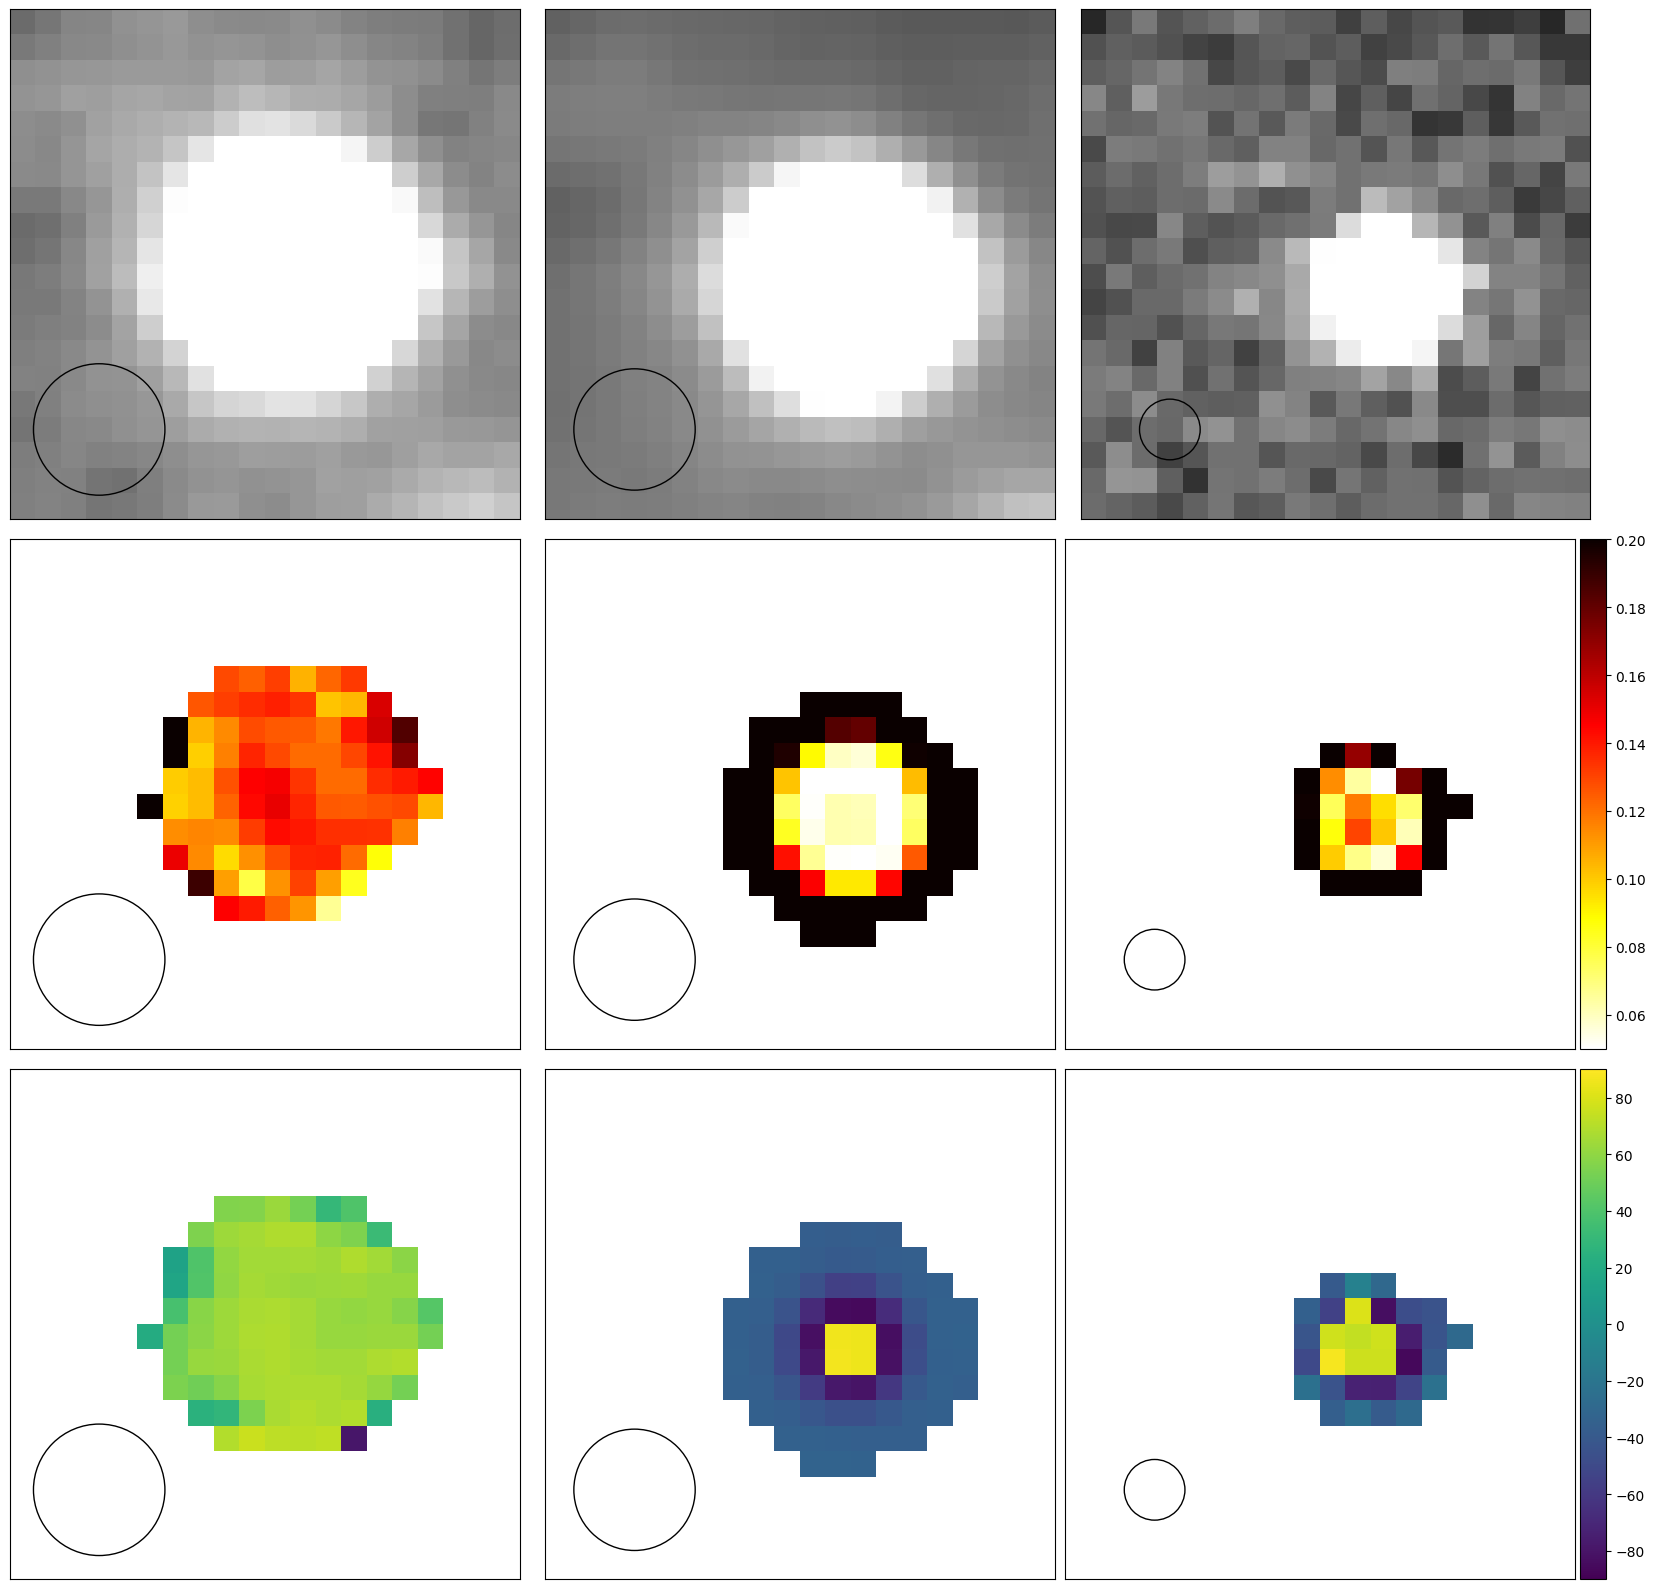

In [5]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.2)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.2)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.05, vmax=0.2)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

for j in range(3):
    for i in range(3):
        beam  = plt.Circle((size*0.15,size*0.8),rpos[i].target_fwhm_pix/2, color='k', fill=False)
        axs[j,i].add_patch(beam)

fig.tight_layout()
plt.show()